# CME 193 - Scientific Python
### Lecture 7 (4/28)
Spring 2016, Stanford University

## Last time
* Dealing with data
* Principal Components analysis

## Today
* HW chat
* Building some predictive models
* Start the HW together

# Statsmodels

Today, we'll look at some of the capability of [StatsModels](http://statsmodels.sourceforge.net/), a Python module developed by the Statistics department here at Stanford.

In [5]:
%matplotlib inline

In [1]:
import random

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1]:
sns.set_context("talk")

# Regression example with Iris data

Let's first look at a linear regression example using the Iris dataset. 
First, we read in the data.

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


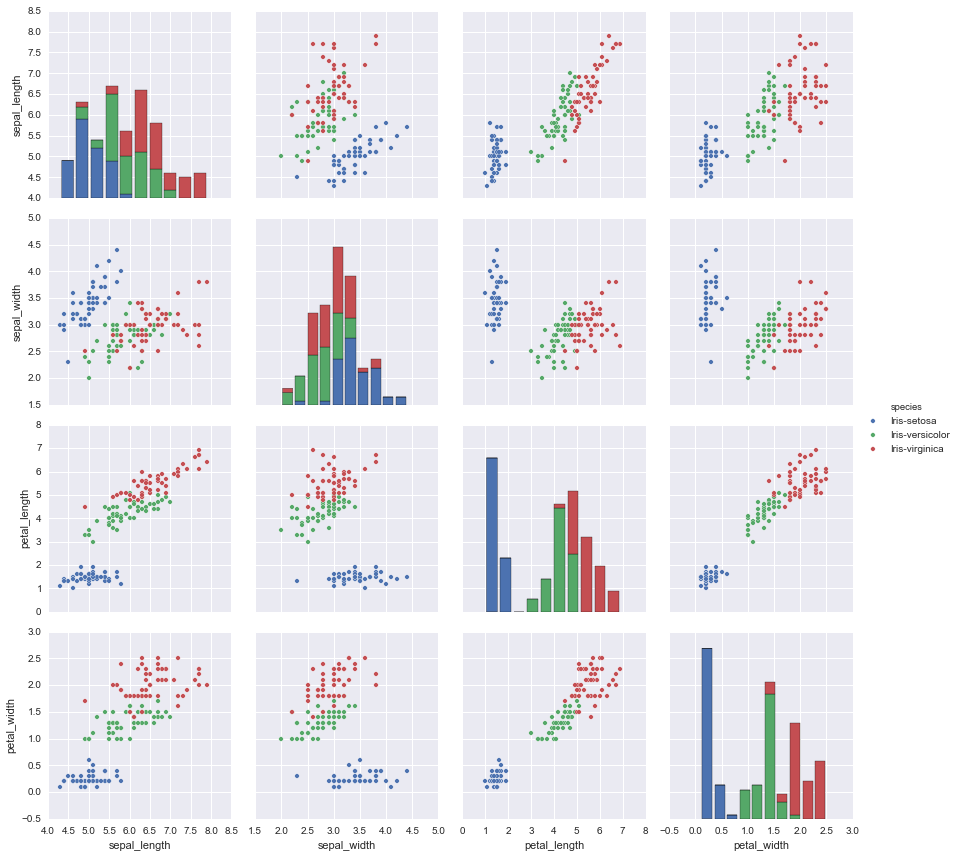

In [6]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

sns.pairplot(iris, hue='species')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Predicting sepal length

For educational purposes, let's assume that we are intested in predicting the sepal length given the other variables.

We split the data into a training and a test set, so that we can validate the performance on held out data

In [8]:
# number of observations
n = len(iris)
is_train = np.random.rand(n) < 0.7

In [9]:
train = iris[is_train].reset_index(drop=True)
test = iris[~is_train].reset_index(drop=True)

We consider a very simple linear model first, where
$$ \text{sepal_length} = \beta_0 + \beta_1 \text{sepal_width} + \epsilon $$

In [10]:
lin_model = smf.ols('sepal_length ~ sepal_width', train).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.855
Date:                Thu, 28 Apr 2016   Prob (F-statistic):              0.176
Time:                        10:16:43   Log-Likelihood:                -118.51
No. Observations:                  96   AIC:                             241.0
Df Residuals:                      94   BIC:                             246.1
Df Model:                           1                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.6095      0.572     11.561      0.000         5.474     7.745
sepal_width    -0.2512      0.184     -1.362      0.176        -0.617     0.115
==============================================================================
Omnibus:                        3.741   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.663
Skew:                           0.472   Prob(JB):                        0.160
Kurtosis:                       2.846   Cond. No.                         22.8
==============================================================================
"""

### Evaluating accuracy

Let's compute the RMSE to see how well this model is able to predict sepal lenghts on our test set

In [11]:
def rmse(y, yhat):
    return np.sum((y - yhat)**2)**0.5

In [12]:
preds = lin_model.predict(test)
print 'The RMSE is {}'.format(rmse(test['sepal_length'], preds))

The RMSE is 5.88365166997


### Expanding our model

We can add some more variables to see if we can improve our predictions

In [13]:
lin_model = smf.ols('sepal_length ~ sepal_width + petal_width + petal_length + species', train).fit()

In [14]:
print lin_model.summary()

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 28 Apr 2016   Prob (F-statistic):           7.87e-36
Time:                        10:17:29   Log-Likelihood:                -27.646
No. Observations:                  96   AIC:                             67.29
Df Residuals:                      90   BIC:                             82.68
Df Model:                           5                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      2.2043      0.371      5.948      0.000         1.468     2.941
spec

In [15]:
preds = lin_model.predict(test)

In [16]:
print '\nThe RMSE is {}'.format(rmse(test['sepal_length'], preds))


The RMSE is 1.90624999051


We note that we are much better able to predict the sepal length using the extra information we included.

In [18]:
iris['sepal_length_hat'] = lin_model.predict(iris)

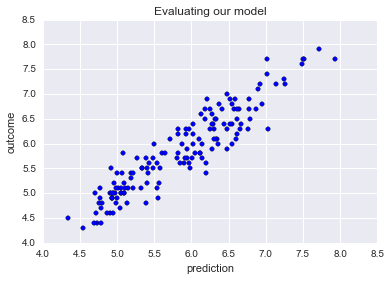

In [19]:
f, ax = plt.subplots()
ax.scatter(iris['sepal_length_hat'], iris['sepal_length'])
ax.set_xlabel('prediction')
ax.set_ylabel('outcome')
ax.set_title('Evaluating our model')

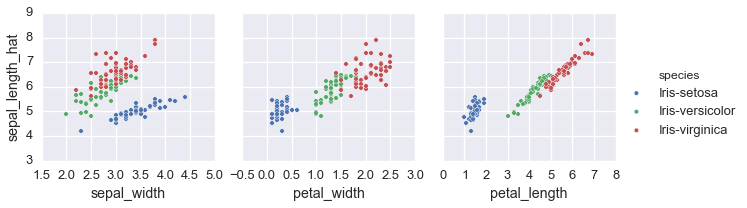

In [9]:
sns.pairplot(iris, hue='species', y_vars=['sepal_length_hat'], 
             x_vars=['sepal_width', 'petal_width', 'petal_length'])

# Logistic regression on the Titanic dataset

Let's also try to predict survival on the titanic using logistic regression.

In [30]:
URL = 'https://raw.githubusercontent.com/schmit/cme193-ipython-notebooks-lecture/master/data/titanic.csv'
df = pd.read_csv(URL).drop(['PassengerId', 'Ticket', 'Cabin', 'Age'], 1)
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


We note that there are some missing values:

In [31]:
df.isnull().sum(0)

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

So let's get rid of them:

In [32]:
df = df.dropna()

In [34]:
log_model = smf.logit('Survived ~ C(Pclass) + Sex + C(Pclass):Sex', df).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.448800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Apr 2016   Pseudo R-squ.:                  0.3254
Time:                        10:23:57   Log-Likelihood:                -398.98
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 5.452e-81
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      3.3900      0.587      5.775      0.000         2.240     4.541
C(Pclass)[T.2]                -0.9333      0.725     -1.287      0.198        -2.354     0.488
C(Pclass)[T.3]                -3.3900      0.610     -5.556      0.000        -4.586    -2.194
Sex[T.male]                   -3.9272      0.616     -6.373      0.000        -5.135    -2.719
C(Pclass)[T.2]:Sex[T.male]    -0.2072      0.794     -0.261      0.794        -1.764     1.349
C(Pclass)[T.3]:Sex[T.male]     2.0735      0.657      3.154      0.002         0.785     3.362
==============================================================================================
"""

In [35]:
df['Survived_hat'] = log_model.predict(df)

In [15]:
df.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Survived_hat
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,0.135447
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,0.967391
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,0.500000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,0.967391
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,0.135447
